In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

In [92]:
# 4 CPUs
file = '/home/yongha/mcwa/1DFreeFormDQN/experiments/DQN/2022_09_16_14_07_47/wl900.0_angle60.0_ncells64/comp_table.csv'
df = pd.read_csv(file)
df.drop('Unnamed: 0', axis=1, inplace=True)

# TMM to SMM

In [93]:
df['gap-1'] = df['mcwat-1'] - df['mcwas-1']
df['gap0'] = df.mcwat0 - df.mcwas0
df['gap+1'] = df['mcwat+1'] - df['mcwas+1']
df['t_gap'] = df.t_mcwat - df.t_mcwas
df['tpr_gap'] = df.tpr_mcwat - df.tpr_mcwas


# Benchmark

## abs(difference in transmittance)

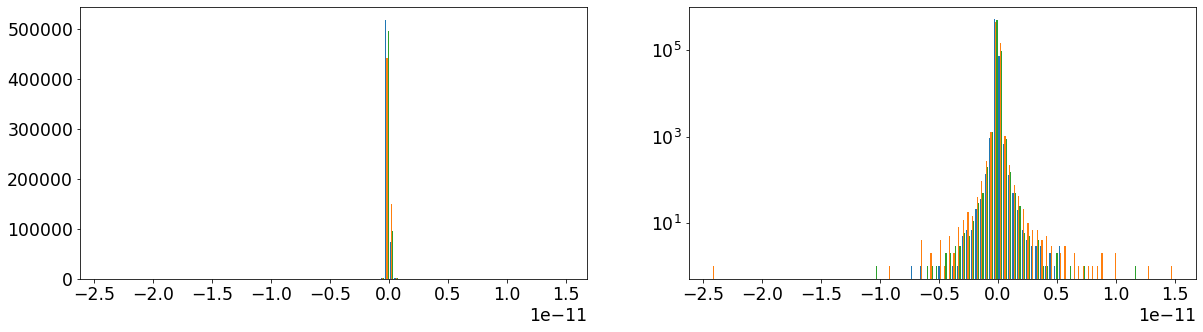

In [94]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].hist([df['gap-1'], df['gap0'], df['gap+1']], bins=100)
axes[1].hist([df['gap-1'], df['gap0'], df['gap+1']], bins=100)
axes[1].set_yscale('log')
plt.show()

## Normalized abs(difference in transmittance) 

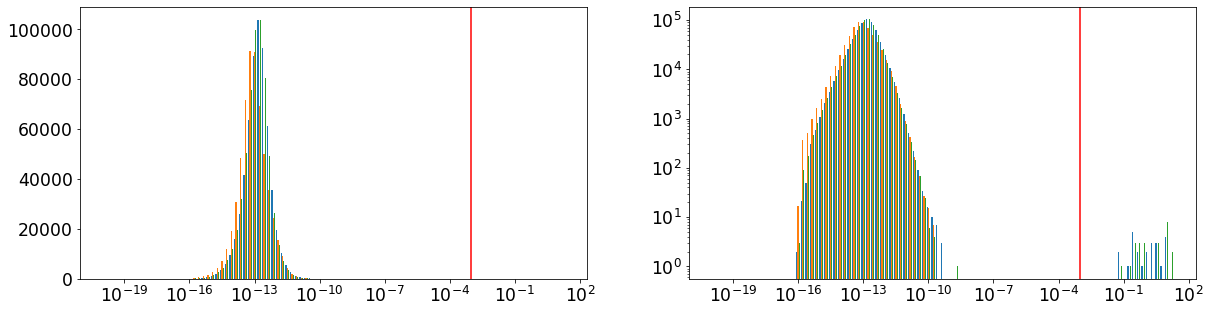

In [95]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].axvline(0.001, c='r')
axes[1].axvline(0.001, c='r')

axes[0].hist([abs(df['gap-1']/df['mcwat-1']), abs(df['gap0']/df['mcwat0']), abs(df['gap+1']/df['mcwat+1'])], bins=np.logspace(np.log10(1E-20), np.log10(20),100))
axes[0].set_xscale('log')

axes[1].hist([abs(df['gap-1']/df['mcwat-1']), abs(df['gap0']/df['mcwat0']), abs(df['gap+1']/df['mcwat+1'])], bins=np.logspace(np.log10(1E-20), np.log10(20),100))
axes[1].set_xscale('log')
axes[1].set_yscale('log')

plt.show()

right side of vertical red line: normalized error >= 0.1 %

orange is 0th order

In [96]:
df[abs(df['gap-1']/df['mcwat-1'])>0.001][['mcwat-1', 'mcwas-1', 'gap-1']]

,mcwat-1,mcwas-1,gap-1
3105,2.062383e-31,7.328936e-31,-5.266554e-31
6223,1.258185e-31,6.481429e-31,-5.223243e-31
7226,4.596980e-30,1.816898e-31,4.415290e-30
7475,4.287140e-31,5.349227e-31,-1.062087e-31
8472,2.514653e-32,4.611096e-30,-4.585950e-30
10575,3.172932e-31,3.696333e-31,-5.234004e-32
15408,2.123246e-28,2.616370e-28,-4.931233e-29
16394,1.054765e-30,9.806301e-31,7.413443e-32
21469,1.882113e-31,2.080262e-30,-1.892051e-30
79794,4.287140e-31,5.349227e-31,-1.062087e-31


In [97]:
df[abs(df['gap0']/df['mcwat0'])>0.001][['mcwat0', 'mcwas0', 'gap0']]

,mcwat0,mcwas0,gap0


In [98]:
df[abs(df['gap+1']/df['mcwat+1'])>0.001][['mcwat+1', 'mcwas+1', 'gap+1']]

,mcwat+1,mcwas+1,gap+1
3105,5.636041e-32,8.692807e-31,-8.129203e-31
6223,4.977607e-31,2.674493e-31,2.303114e-31
7226,3.598600e-30,2.285761e-31,3.370024e-30
7475,1.234651e-31,1.458717e-30,-1.335252e-30
8472,3.626643e-31,4.753130e-30,-4.390465e-30
10575,4.247095e-31,3.205230e-31,1.041865e-31
15408,5.874451e-28,4.514179e-28,1.360272e-28
16394,3.136694e-31,1.521044e-30,-1.207375e-30
21469,3.936793e-32,1.326363e-30,-1.286995e-30
79794,1.234651e-31,1.458717e-30,-1.335252e-30


Big errors are coming from sub modes which have very small values so normalization harm result.

# benchmark - simulation time

## run time by time.time()

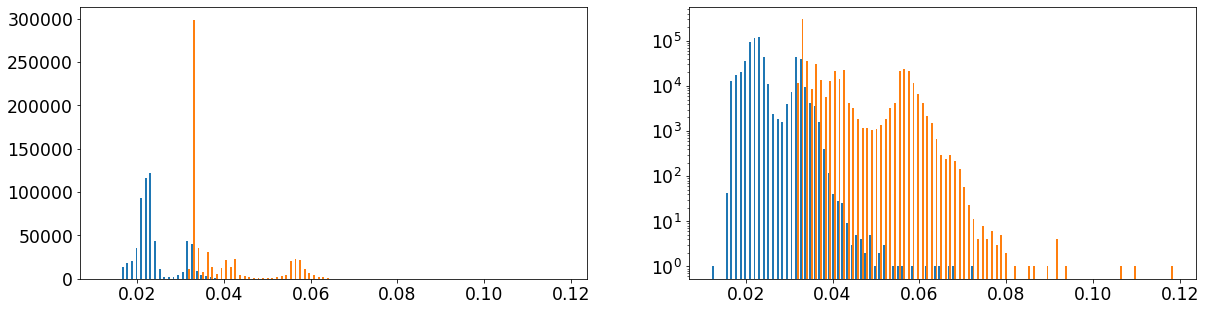

In [99]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].hist([df['t_mcwat'],df['t_mcwas']], bins=100)
# axes[0].hist(df['t_mcwas'], bins=100)
axes[1].hist([df['t_mcwat'],df['t_mcwas']], bins=100, log=True)
# axes[1].hist(df['t_mcwas'], bins=100, log=True)
# plt.xscale('log')
plt.show()

Blue is  meent with TMM, Oragne is meent with SMM

## SMM time / TMM time

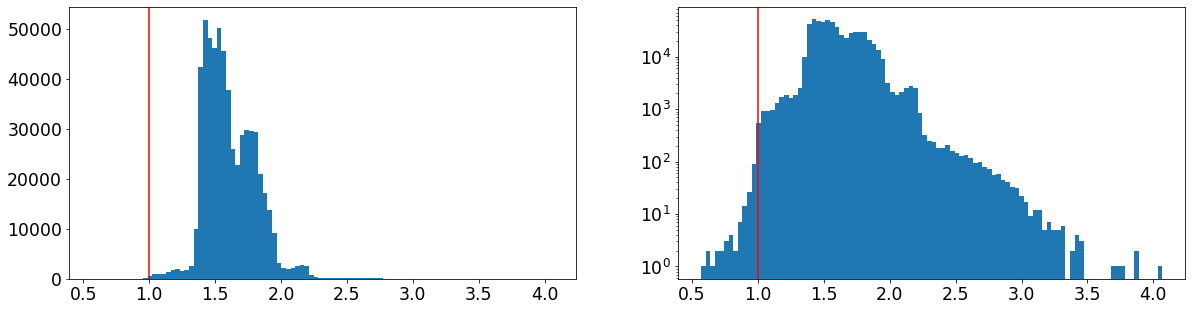

In [100]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].axvline(1, c='r')
axes[1].axvline(1, c='r')
axes[0].hist((df['t_mcwas'])/df['t_mcwat'], bins=100)
axes[1].hist((df['t_mcwas'])/df['t_mcwat'], bins=100)
axes[1].set_yscale('log')
plt.show()

In [101]:
pd.DataFrame((df['t_mcwas']/df['t_mcwat']).describe()).T

,count,mean,std,min,25%,50%,75%,max
0,594421.0,1.611731,0.198503,0.567782,1.464564,1.572947,1.747113,4.066429


TMM is faster 1.6 times than SMM.

right side of red line: TMM is faster


## time.process_time()

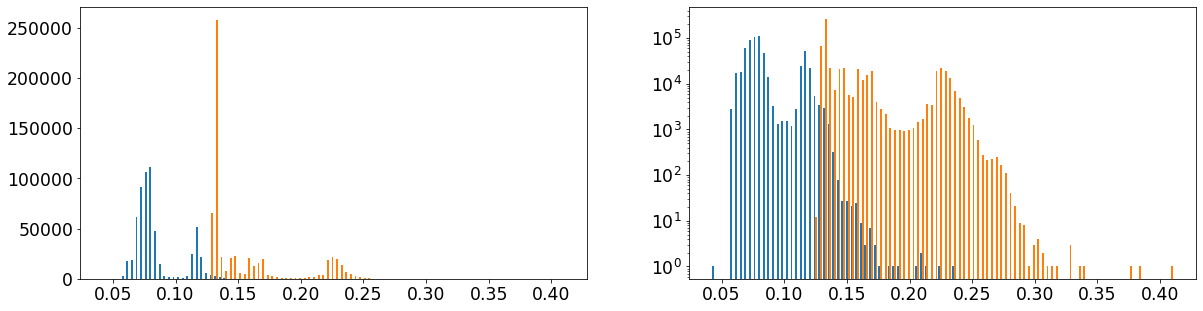

In [102]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].hist([df['tpr_mcwat'],df['tpr_mcwas']], bins=100)
# axes[0].hist(df['t_mcwas'], bins=100)
axes[1].hist([df['tpr_mcwat'],df['tpr_mcwas']], bins=100, log=True)
# axes[1].hist(df['t_mcwas'], bins=100, log=True)
# plt.xscale('log')
plt.show()

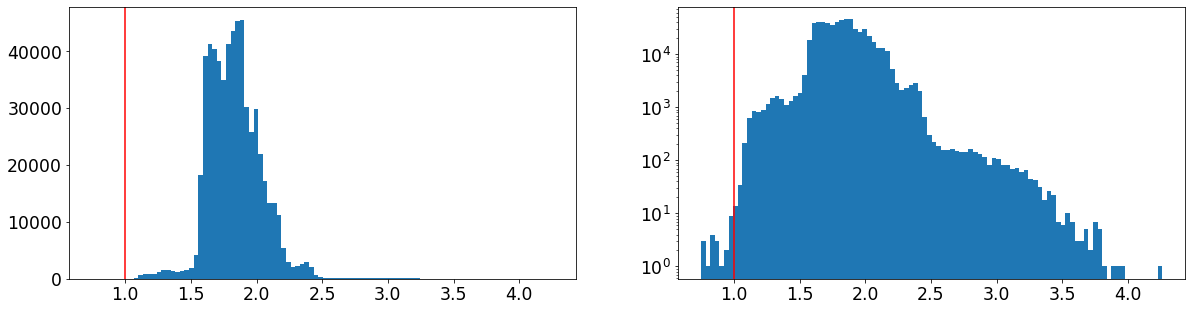

In [103]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].axvline(1, c='r')
axes[1].axvline(1, c='r')
axes[0].hist((df['tpr_mcwas'])/df['tpr_mcwat'], bins=100)
axes[1].hist((df['tpr_mcwas'])/df['tpr_mcwat'], bins=100)
axes[1].set_yscale('log')
plt.show()

In [104]:
pd.DataFrame((df['tpr_mcwas']/df['tpr_mcwat']).describe()).T

,count,mean,std,min,25%,50%,75%,max
0,594421.0,1.834857,0.207524,0.749124,1.689048,1.822139,1.955127,4.260806
